In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from scipy.stats import pearsonr

def simulate_flips(n, p=0.6):
    sim = np.zeros(n)
    for _ in range(n):
        sim[_] = 1 if np.random.rand() < p else 0
    return sim
        
coin_data = simulate_flips(100)
coin_data[:10]

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1.])

In [20]:
sum(coin_data) / 100

0.64

In [21]:
# log(p^H (1-p)^(N - H)) = H log(p) + (N-H) log(1-p)
def log_lk(p, data=coin_data):
    heads = sum(data)
    tails = data.shape[0] - heads
    ans = heads*np.log(p) + tails*np.log(1-p) 
    return ans

log_lk(0.6)

-65.67930626849298

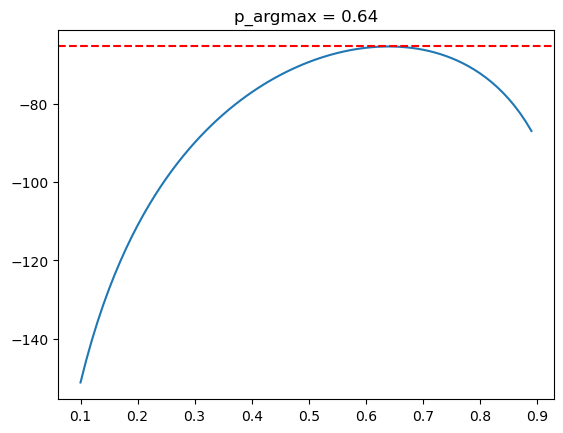

In [22]:
p_range = np.arange(.1, .9, 0.01)

def get_log_lk_range(log_lk_func, p_range=p_range, plot=True):
    p_range = np.arange(.1, .9, 0.01)
    ans = [log_lk_func(p) for p in p_range]
    log_lk_argmax = np.argmax(ans)
    p_argmax = p_range[log_lk_argmax]
    if plot:
        fig, ax = plt.subplots()
        ax.plot(p_range, ans)
        ax.set_title(f'p_argmax = {round(p_argmax, 2)}')
        plt.axhline(ans[log_lk_argmax], ls='--', c='r')
    return ans, log_lk_argmax

log_lk_range, p_argmax = get_log_lk_range(log_lk);

In [23]:
def estimate_accuracy(log_lk_range, p_argmax):
    diff1_log_lk = np.diff(log_lk_range) / 0.01
    diff2_log_lk = np.diff(diff1_log_lk) / 0.01
    return 1/np.sqrt(-diff2_log_lk[p_argmax])

estimate_accuracy(log_lk_range, p_argmax)

0.04737821423638574